# Ch02.08. Seborn 실습 - 아이리스 데이터


---

* 날짜:2022-04-19
* 이름:안창덕


## 학습내용

    - distplot을 이용해 데이터 분포를 시각화 한다.
    - jointplot을 이용해 두 변수의 분포를 시각화 한다.


```
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')
```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2, style='white', palette='Set2')


## **실습**
---



### (1) 데이터 기본 탐색


#### | 데이터 준비

```
from sklearn.datasets import load_iris
iris = load_iris()

x_names = iris.feature_names
print(x_names)
y_names = iris.target_names
print(y_names)

xs = iris.data
print('x',xs.shape)
y = iris.target
print('y',y.shape)
```

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

#### | 데이터 기본 탐색


In [3]:
x_names = iris.feature_names
print(x_names)
y_names = iris.target_names
print(y_names)

xs = iris.data
print('x',xs.shape)
y = iris.target
print('y',y.shape)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
x (150, 4)
y (150,)


In [11]:
iris = pd.DataFrame(xs)
iris.columns = x_names
iris['label'] = [y_names[i] for i in y]
iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [18]:
#꽃받침 사이즈 값을 구해서 크기에 따라 구분

sepal_size = iris.iloc[:,0] * iris.iloc[:,1] #너비와 길이 곱
sepal_size.mean() #주앙값:17.66 절반 small  나머지big 

sepal_size = np.array(sepal_size > 17.66, dtype='int8')
sepal_size = [['small','big'][i] for i in sepal_size]

iris['sepal_size'] = sepal_size
iris


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,sepal_size
0,5.1,3.5,1.4,0.2,setosa,big
1,4.9,3.0,1.4,0.2,setosa,small
2,4.7,3.2,1.3,0.2,setosa,small
3,4.6,3.1,1.5,0.2,setosa,small
4,5.0,3.6,1.4,0.2,setosa,big
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,big
146,6.3,2.5,5.0,1.9,virginica,small
147,6.5,3.0,5.2,2.0,virginica,big
148,6.2,3.4,5.4,2.3,virginica,big


In [19]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    object 
 5   sepal_size         150 non-null    object 
dtypes: float64(4), object(2)
memory usage: 7.2+ KB


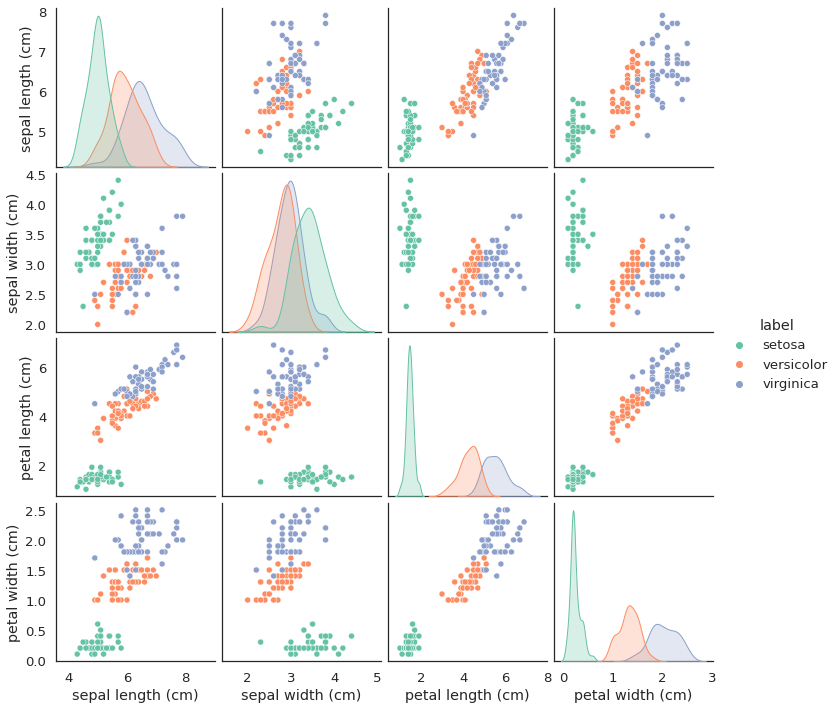

In [22]:
sns.pairplot(iris, hue='label')
plt.show()

### (2) Distributions plot

![](https://seaborn.pydata.org/_images/function_overview_8_0.png)

```
seaborn.displot(data=None, x=None, y=None, 
                hue=None, hue_order=None, hue_norm=None, 
                row=None, col=None, 
                row_order=None, col_order=None,
                weights=None,
                kind='hist', # {“hist”, “kde”, “ecdf”}
                rug=False, rug_kws=None, 
                log_scale=None, 
                legend=True, 
                palette=None, color=None, col_wrap=None,  
                height=5, aspect=1)

```

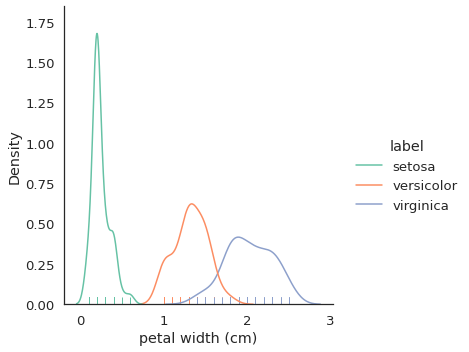

In [27]:
sns.displot(iris, x=x_names[-1], kind='kde', 
            hue='label',
            rug=True) #밑에 눈금생기고 데이터 많은 곳에 진하게 됨
            

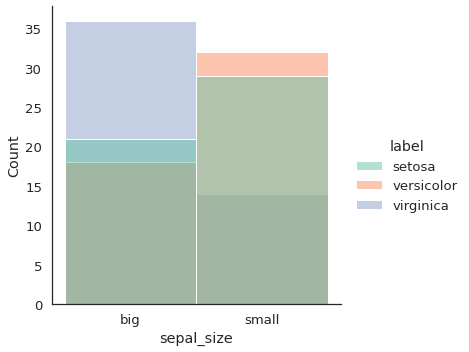

In [36]:
sns.displot(iris, x='sepal_size', 
            hue='label')

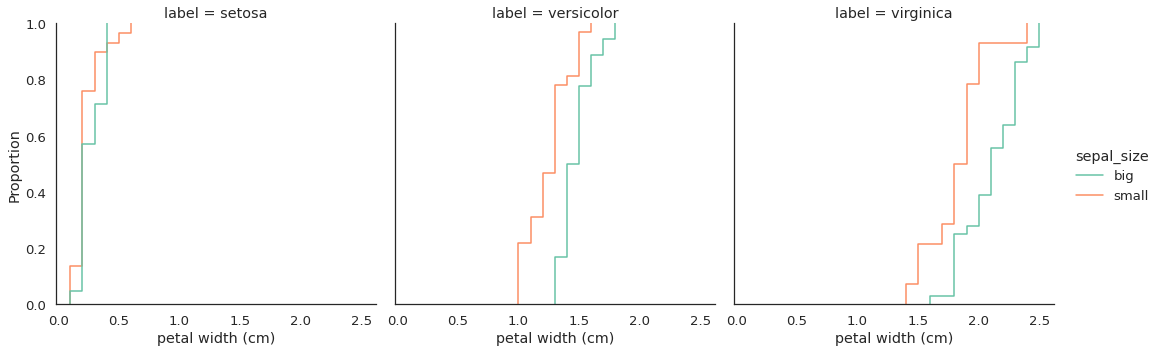

In [41]:
sns.displot(iris, x=x_names[-1], kind='ecdf',
            hue='sepal_size',
            col='label') #열별로 종류보기

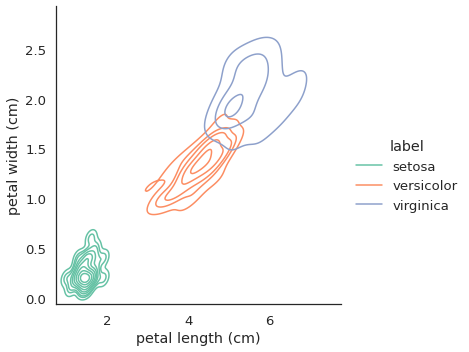

In [40]:
sns.displot(iris, x=x_names[2], y=x_names[3], hue='label',
            kind='kde')

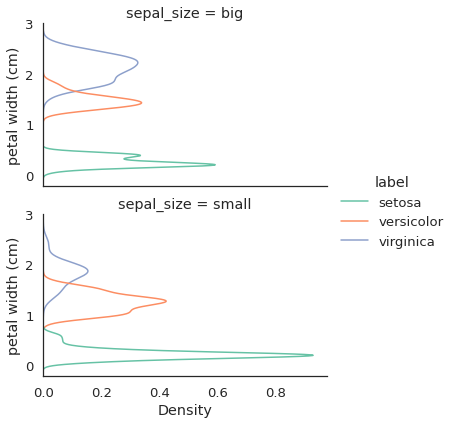

In [44]:
sns.displot(iris, y=x_names[3], hue='label',
            kind='kde', row='sepal_size', height=3, aspect=1.6)  #row 행방향 구분

### (3) Joint plot


```
seaborn.jointplot(x=None, y=None, data=None, 
                  hue=None,
                  hue_order=None,
                  color=None, 
                  palette=None,
                  kind='scatter', # { “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }
                  height=6, ratio=5, space=0.2, 
                  xlim=None, ylim=None, 
                  marginal_ticks=False)
```

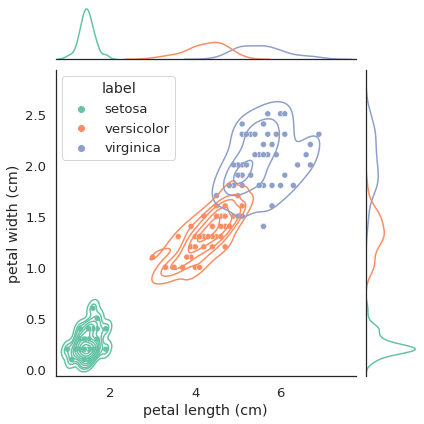

In [57]:
g = sns.jointplot(data=iris, x=x_names[2], y=x_names[3], hue='label',
              kind='kde')
#플롯에 산점도 추가
g.plot_joint(sns.scatterplot)


## **과제: [penguin dataset : The new Iris](https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/notebook)**

---

![](https://imgur.com/orZWHly.png)



### (1) 데이터 기본 탐색


#### | 데이터 준비

```
df = sns.load_dataset('penguins')
```

In [58]:
df = sns.load_dataset('penguins')

#### | 데이터 기본 탐색


In [59]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


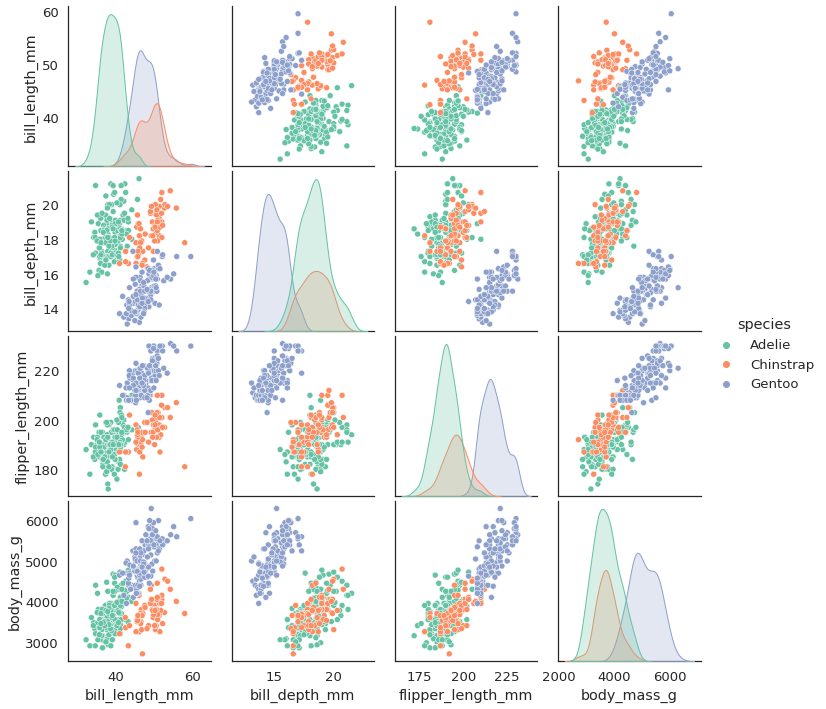

In [64]:
sns.pairplot(data=df, hue='species')

### (2) Distributions plot


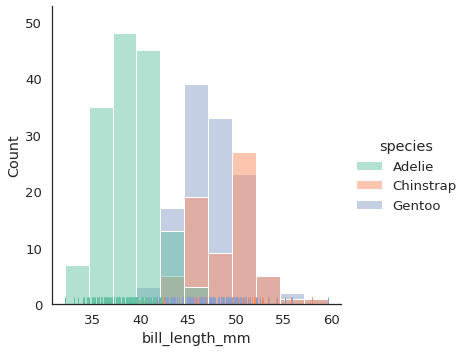

In [77]:
sns.displot(df, x='bill_length_mm', hue='species',
            kind='hist',
            rug=True)

### (3) Joint plot


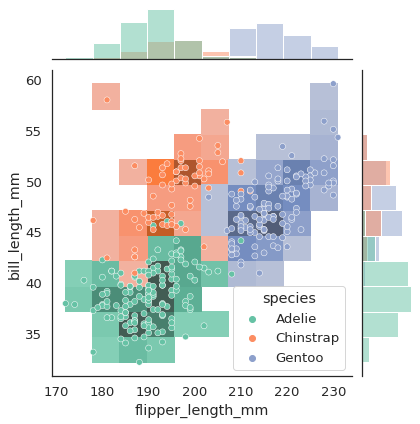

In [78]:
g = sns.jointplot(data=df, x='flipper_length_mm', y='bill_length_mm', hue='species',
                  kind='hist')
g.plot_joint(sns.scatterplot)

In [ ]:
# 'Adelie'은 지느러미가 짧고 부리도 짧다
# 'Chinstrap'은 지느러미가 짧지만 부리는 길다.
# 'Gentoo'는 지느러미도 길고 부리도 길다.

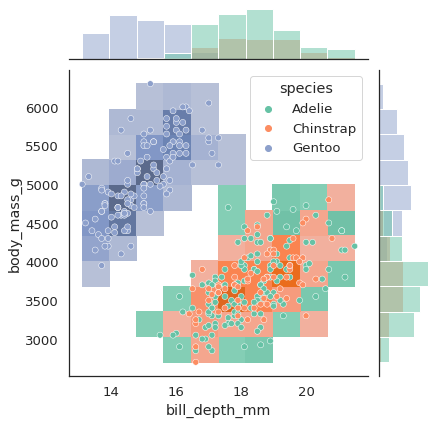

In [79]:
g = sns.jointplot(data=df, x='bill_depth_mm', y='body_mass_g', hue='species',
                  kind='hist')
g.plot_joint(sns.scatterplot)

In [ ]:
# 'Gentoo'는 부리가 얇고 몸무게가 무겁다.

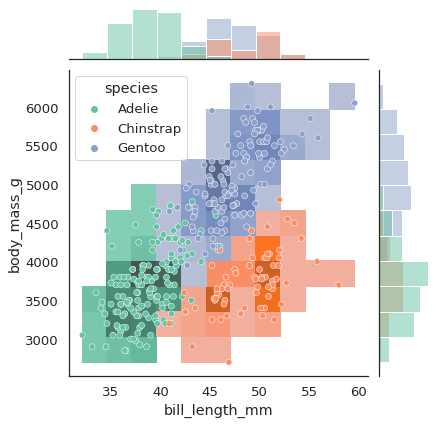

In [80]:
g = sns.jointplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species',
                  kind='hist')
g.plot_joint(sns.scatterplot)

In [ ]:
# 'Adelie'은 부리가 짧고 몸무게가 적게 나간다.
# 'Chinstrap'는 부리가 길지만 몸무게는 적게나간다.
# 'Gentoo'는 몸무게가 많이 나가고 부리도 길다.